# Financial Fraud Detection Model using Machine Learning

## 1. Introduction

**Author:**
* Danielle Sismon

**Course:** Software Development (Multi-platform)
**Subject:** Machine Learning

### Project Context

In the contemporary digital financial landscape, transaction speed is paramount. However, this speed also opens doors to threats, with financial fraud being one of the most critical. Fraudulent transactions represent billions of dollars in losses annually for financial institutions and their customers. The ability to detect these anomalies in real-time is not just a competitive advantage, but an operational and security necessity.

### Objective

The core objective of this work is to develop and evaluate a *Machine Learning* model capable of classifying financial transactions as "Legitimate" or "Fraudulent".

Using a public dataset with over 1 million transactions, we aim to build a predictive system that serves as an effective risk mitigation tool. We focus not only on overall accuracy but on critical business metrics such as **Recall** (the ability to find the maximum number of actual frauds) and **Precision** (the ability to minimize false positives, avoiding the blocking of legitimate customers).

### Methodology

To achieve this goal, the project follows the standard *Data Science* lifecycle:

1.  **Data Collection:** Researching reliable sources (such as IBGE, INPE, open data portals, DATASUS, Google Dataset Search, AWS Public Datasets) and downloading a dataset with the quantity and quality necessary for machine training, ensuring alignment with the project's goal: Financial Fraud.
    * *Dataset Source:* https://www.kaggle.com/datasets/parthaade/fraud-analysis
2.  **Exploratory Data Analysis (EDA):** Investigating the dataset to identify structure, data types, null values, and most importantly, the extreme class imbalance (99.9% legitimate vs. 0.1% fraud).
3.  **Preprocessing & Data Cleaning:** Data cleaning, noise removal, transformation of categorical variables into numerical ones (One-Hot Encoding), and Scale Normalization.
4.  **Data Balancing:** Application of the *RandomUnderSampler* technique to create a balanced training set (50/50), forcing the model to learn the patterns of the minority class (fraud).
5.  **Modeling & Training:** Selection, justification, and training of two classification algorithms (Logistic Regression and Decision Tree).
6.  **Evaluation & Conclusion:** Performance analysis of the models on the test set (realistic and imbalanced), using the Confusion Matrix, *Recall*, and *Precision* to select the champion model and derive conclusions.

In [1]:
# -----------------------------------------------------------------
# CELL 1: Load and Inspect the 'Fraud.csv' Dataset
# -----------------------------------------------------------------
import pandas as pd
import warnings

# Disable common Pandas warnings for cleaner output
warnings.filterwarnings('ignore')

# Exact name of the dataset including extension:
file_name = 'Fraud.csv' 
    
print(f"Starting to load file: {file_name}...")
print("This may take a few seconds, please wait.\n")

# Loading dataset data with comma separator (','), which is default:
# 'low_memory=False' helps load large files without data type warnings:

try:
    df = pd.read_csv(file_name, sep=',', low_memory=False)
except Exception as e:
    print(f"ERROR: Could not load file. Check if name is correct. Error: {e}")
    
# --- PRELIMINARY DATA ANALYSIS ---
# Inspecting the data that was just loaded:
print("\n--- PRELIMINARY DATA ANALYSIS ---")
print("=========================================")

# .info() shows data types (int, float, object) and if there are nulls:
print("\n[INFO] Initial Info (Data Types, Nulls, Column Names):")

df.info()

# .head() shows the first 5 lines to see the content:
print("\n[HEAD] Initial Sample (First 5 Rows):")
print(df.head())

print(f"\n[SUCCESS] Data loading complete!")
print(f"We have a total of {df.shape[0]} rows and {df.shape[1]} columns.")
print("Our 'Target' (Label) will be the 'isFraud' column.")
print("Our 'Features' (Clues) will be the other relevant columns.")

Starting to load file: Fraud.csv...
This may take a few seconds, please wait.


--- PRELIMINARY DATA ANALYSIS ---

[INFO] Initial Info (Data Types, Nulls, Column Names):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB

[HEAD] Initial Sample (First 5 Rows):
   s

--- 1. Target Class Imbalance Analysis ('isFraud') ---
isFraud
0    1047433
1       1142
Name: count, dtype: int64

Percentage of fraudulent transactions: 0.1089%
Percentage of legitimate transactions: 99.8911%


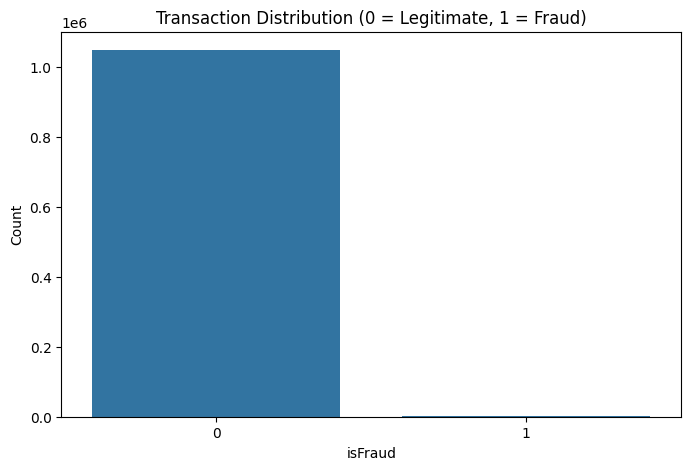



--- 2. Statistical Analysis ---
Descriptive statistics (mean, std dev, min, max) of numerical columns:
             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  1.048575e+06   1.048575e+06    1.048575e+06    1.048575e+06   
mean   1.586670e+05   8.740095e+05    8.938089e+05    9.781600e+05   
std    2.649409e+05   2.971751e+06    3.008271e+06    2.296780e+06   
min    1.000000e-01   0.000000e+00    0.000000e+00    0.000000e+00   
25%    1.214907e+04   0.000000e+00    0.000000e+00    0.000000e+00   
50%    7.634333e+04   1.600200e+04    0.000000e+00    1.263772e+05   
75%    2.137619e+05   1.366420e+05    1.746000e+05    9.159235e+05   
max    1.000000e+07   3.890000e+07    3.890000e+07    4.210000e+07   

       newbalanceDest  
count    1.048575e+06  
mean     1.114198e+06  
std      2.416593e+06  
min      0.000000e+00  
25%      0.000000e+00  
50%      2.182604e+05  
75%      1.149808e+06  
max      4.220000e+07  


In [2]:
# -----------------------------------------------------------------
# CELL 2: Exploratory Data Analysis (EDA) - Imbalance and Statistics
# -----------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

print("--- 1. Target Class Imbalance Analysis ('isFraud') ---")
print("================================================================")

# Counting how many 0s (Non-Fraud) and 1s (Fraud) exist:
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

# Calculating the percentage of Non-Fraud and Fraud:
fraud_percentage = (fraud_counts[1] / fraud_counts.sum()) * 100
print(f"\nPercentage of fraudulent transactions: {fraud_percentage:.4f}%")
print(f"Percentage of legitimate transactions: {100 - fraud_percentage:.4f}%")

# Creating a bar chart to visualize this percentage:
plt.figure(figsize=(8, 5)) # Sets figure size
sns.countplot(x='isFraud', data=df)
plt.title('Transaction Distribution (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Count')
plt.show() # Displays the plot


print("\n\n--- 2. Statistical Analysis ---")
print("==========================================================")
print("Descriptive statistics (mean, std dev, min, max) of numerical columns:")

# The .describe() command gives us all requested statistics
# Let's focus on the columns that seem most important
columns_to_describe = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
print(df[columns_to_describe].describe())

--- 3. Analysis of 'type' Column (Transaction Type) ---
type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

Total frauds by transaction type:
type
CASH_IN       0
CASH_OUT    578
DEBIT         0
PAYMENT       0
TRANSFER    564
Name: isFraud, dtype: int64


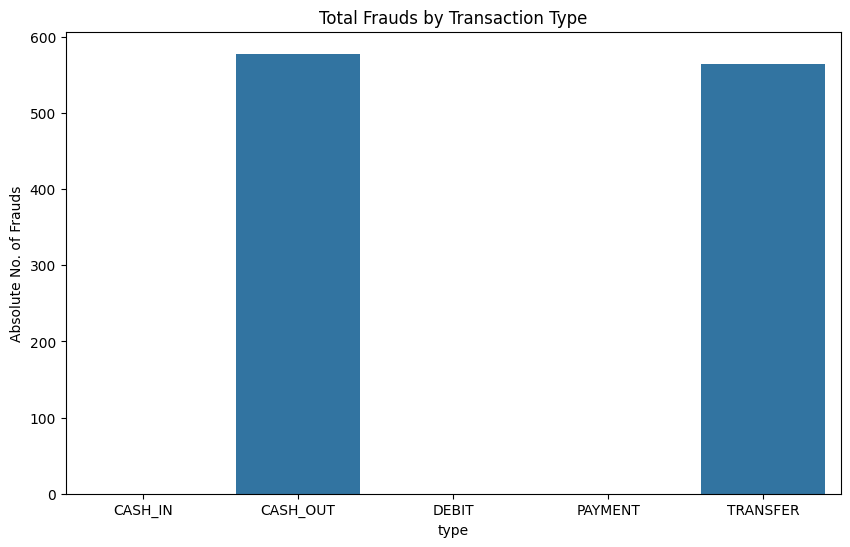



--- 4. Noise Analysis (ID Columns) ---
Number of unique origin clients ('nameOrig'): 1048317
Number of unique destination clients ('nameDest'): 449635

Total rows in dataset: 1048575

[DIAGNOSIS] 'nameOrig' is an ID column (noise). Should be removed in processing.
[DIAGNOSIS] 'nameDest' is an ID column (noise). Should be removed in processing.


In [3]:
# -----------------------------------------------------------------
# CELL 3: Exploratory Data Analysis (EDA) - Categorical Columns (Text)
# -----------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

print("--- 3. Analysis of 'type' Column (Transaction Type) ---")
print("======================================================")

# Counting how many transactions of each type exist:
print(df['type'].value_counts())

# Crossing 'type' data with 'isFraud' to see where frauds happen:
# Using .groupby() to group by 'type' and sum frauds ('isFraud' == 1):
frauds_by_type = df.groupby('type')['isFraud'].sum()
print("\nTotal frauds by transaction type:")
print(frauds_by_type)

# Creating a bar chart to visualize this data crossing:
plt.figure(figsize=(10, 6))
sns.barplot(x=frauds_by_type.index, y=frauds_by_type.values)
plt.title('Total Frauds by Transaction Type')
plt.ylabel('Absolute No. of Frauds')
plt.show()


print("\n\n--- 4. Noise Analysis (ID Columns) ---")
print("============================================")

# Checking how many unique values exist in "ID" columns:
# If the number is too high, they are "noise" and don't serve as features.
unique_orig = df['nameOrig'].nunique()
unique_dest = df['nameDest'].nunique()

print(f"Number of unique origin clients ('nameOrig'): {unique_orig}")
print(f"Number of unique destination clients ('nameDest'): {unique_dest}")
print(f"\nTotal rows in dataset: {df.shape[0]}")

if unique_orig > df.shape[0] * 0.9: # If more than 90% of names are unique:
    print("\n[DIAGNOSIS] 'nameOrig' is an ID column (noise). Should be removed in processing.")
if unique_dest > df.shape[0] * 0.4: # A bit more flexible for destinations:
    print("[DIAGNOSIS] 'nameDest' is an ID column (noise). Should be removed in processing.")

In [4]:
# -----------------------------------------------------------------
# CELL 4: Data Treatment and Preparation (Preprocessing)
# -----------------------------------------------------------------
import pandas as pd

print("--- Starting Data Preprocessing ---")
print("===============================================")

# Creating a copy to preserve the original DataFrame 'df':
df_clean = df.copy()

# --- 1. JUSTIFICATION: Noise Removal ---
# As diagnosed in CELL 3, columns 'nameOrig' and 'nameDest' are IDs
# with almost unique values (noise) and do not help the model. So they will be removed:
columns_to_remove = ['nameOrig', 'nameDest']
df_clean = df_clean.drop(columns=columns_to_remove)
print(f"[TREATMENT 1] Columns removed: {columns_to_remove}")


# --- 2. JUSTIFICATION: Transforming Categorical Data to Numerical (One-Hot Encoding) ---
# As diagnosed in CELL 1, the 'type' column is text ('object').
# The model doesn't understand text. Using 'pd.get_dummies()' (One-Hot Encoding)
# to transform 'type' into numerical columns (0 or 1).
df_clean = pd.get_dummies(df_clean, columns=['type'], prefix='type')
print(f"[TREATMENT 2] Column 'type' transformed into numerical columns.")


# --- 3. JUSTIFICATION: Definition of Features (X) and Target (y) ---
# Now we separate our "clues" (Features) from our "answer key" (Target).
# Our Target is the 'isFraud' column.
# Our Features are ALL other columns remaining.
y = df_clean['isFraud']
X = df_clean.drop(columns=['isFraud'])
print(f"[TREATMENT 3] Data separated into Features (X) and Target (y).")


# --- 4. DATA PRESENTATION AFTER TREATMENT ---
print("\n\n--- DATA PRESENTATION AFTER TREATMENT ---")
print("================================================")
print("Our data is now 100% numerical and ready for the model.")

print("\n[INFO] Features (X) - Post-Treatment:")
X.info()

print("\n[HEAD] Features (X) - Post-Treatment Sample:")
print(X.head())

print("\n[HEAD] Target (y) - Sample:")
print(y.head())

--- Starting Data Preprocessing ---
[TREATMENT 1] Columns removed: ['nameOrig', 'nameDest']
[TREATMENT 2] Column 'type' transformed into numerical columns.
[TREATMENT 3] Data separated into Features (X) and Target (y).


--- DATA PRESENTATION AFTER TREATMENT ---
Our data is now 100% numerical and ready for the model.

[INFO] Features (X) - Post-Treatment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   amount          1048575 non-null  float64
 2   oldbalanceOrg   1048575 non-null  float64
 3   newbalanceOrig  1048575 non-null  float64
 4   oldbalanceDest  1048575 non-null  float64
 5   newbalanceDest  1048575 non-null  float64
 6   isFlaggedFraud  1048575 non-null  int64  
 7   type_CASH_IN    1048575 non-null  bool   
 8   type_CASH_OUT   1048575 non-null  bool   
 9   type_DE

In [5]:
# -----------------------------------------------------------------
# CELL 5: Split, Normalization, and Balancing
# -----------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

print("--- Starting Preparation for Training ---")
print("=================================================")

# --- 1. JUSTIFICATION: Train/Test Split ---
# It is MANDATORY to split data BEFORE any other step.
# The 'test' (30% of data) will be kept in a "vault" and the model
# will NEVER see it during training. This ensures honest evaluation.
# 'stratify=y' ensures the 0.1% fraud proportion is maintained
# in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"[PREP 1] Data split: {len(X_train)} rows for training, {len(X_test)} rows for testing.")


# --- 2. JUSTIFICATION: Normalization (StandardScaler) ---
# As diagnosed in CELL 2, numerical features (amount, oldbalanceOrg, etc.) have very different scales.
# StandardScaler will put them all on the same "ruler" (mean 0, std dev 1).
# CAUTION: We "learn" the scale (fit) ONLY on TRAINING data
# and then apply (transform) on Train AND Test.

# List of columns needing scaling (all except 'type_' which are already 0/1)
columns_to_scale = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                        'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']

scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

print(f"[PREP 2] Train and Test data normalized successfully.")


# --- 3. JUSTIFICATION: Balancing (RandomUnderSampler) ---
# As diagnosed in CELL 2, our training data is 99.9% / 0.1%.
# The model wouldn't learn. We will use RandomUnderSampler.
# It will take ALL 799 frauds from training (1142 * 0.7)
# and randomly select 799 legitimate transactions to train with.
# The result will be a 50% / 50% (balanced) training dataset.
# IMPORTANT: This is done ONLY ON TRAINING DATA.

rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

print(f"[PREP 3] Training data balanced successfully.")


# --- FINAL DATA PRESENTATION ---
print("\n\n--- DATA READY FOR MODEL ---")
print("=======================================")
print(f"X_train size (original imbalanced): {X_train.shape}")
print(f"X_train size (final balanced):     {X_train_balanced.shape}")
print(f"y_train size (final balanced):     {y_train_balanced.shape}")

print("\nClass count in y_train_balanced (should be 50/50):")
print(y_train_balanced.value_counts())

print("\nSample of X_train_balanced (all numerical and scaled):")
print(X_train_balanced.head())

--- Starting Preparation for Training ---
[PREP 1] Data split: 734002 rows for training, 314573 rows for testing.
[PREP 2] Train and Test data normalized successfully.
[PREP 3] Training data balanced successfully.


--- DATA READY FOR MODEL ---
X_train size (original imbalanced): (734002, 12)
X_train size (final balanced):     (1598, 12)
y_train size (final balanced):     (1598,)

Class count in y_train_balanced (should be 50/50):
isFraud
0    799
1    799
Name: count, dtype: int64

Sample of X_train_balanced (all numerical and scaled):
            step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
46712  -1.150134 -0.481228      -0.292453       -0.285159       -0.422687   
399296 -0.574007 -0.593691      -0.121826       -0.127417       -0.425934   
962143  1.090360 -0.547525       2.739818        2.704780        0.009840   
239833 -0.830063 -0.549948      -0.294078       -0.297118       -0.425934   
234541 -0.830063 -0.527513      -0.285825       -0.295253       -0.42593

In [6]:
# -----------------------------------------------------------------
# CELL 6: Model Selection, Training, and Prediction
# -----------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

print("--- Starting Model Training ---")
print("===========================================")

# --- 1. JUSTIFICATION: Algorithm Selection ---
# Model 1: Logistic Regression
# It is a fast, efficient statistical model, great as a 'baseline'.
# 'solver='liblinear'' is a good choice for small/medium datasets.
model_logistic = LogisticRegression(solver='liblinear', random_state=42)

# Model 2: Decision Tree
# It is a 'white-box' model, easy to interpret and explain.
# 'max_depth=5' limits the tree to 5 levels of "questions" to prevent
# it from memorizing data (overfitting).
model_tree = DecisionTreeClassifier(max_depth=5, random_state=42)


# --- 2. Training ---
# Training models using our balanced data:
print("[TRAIN 1] Training Logistic Regression model...")
model_logistic.fit(X_train_balanced, y_train_balanced)

print("[TRAIN 2] Training Decision Tree model...")
model_tree.fit(X_train_balanced, y_train_balanced)

print("\n[SUCCESS] Models trained successfully!")


# --- 3. Prediction ---
# Now, we use trained models to predict on data they NEVER SAW: X_test.
print("\nPerforming predictions on test data (the 'vault')...")

predictions_logistic = model_logistic.predict(X_test)
predictions_tree = model_tree.predict(X_test)

print("Predictions complete.")

--- Starting Model Training ---
[TRAIN 1] Training Logistic Regression model...
[TRAIN 2] Training Decision Tree model...

[SUCCESS] Models trained successfully!

Performing predictions on test data (the 'vault')...
Predictions complete.


--- EVALUATION MODEL 1: LOGISTIC REGRESSION ---
                precision    recall  f1-score   support

0 (Legitimate)       1.00      0.85      0.92    314230
     1 (Fraud)       0.01      0.88      0.01       343

      accuracy                           0.85    314573
     macro avg       0.50      0.87      0.47    314573
  weighted avg       1.00      0.85      0.92    314573



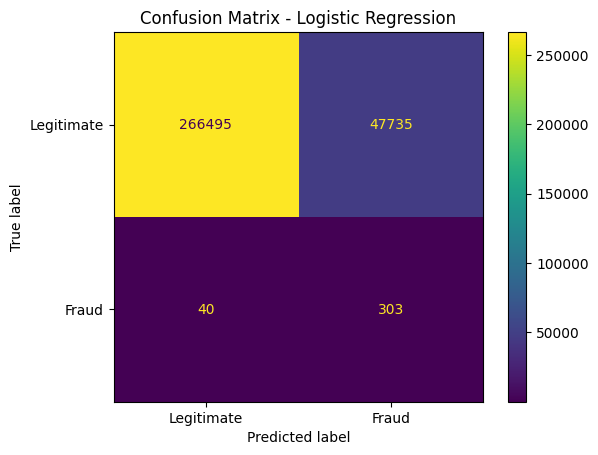



--- EVALUATION MODEL 2: DECISION TREE ---
                precision    recall  f1-score   support

0 (Legitimate)       1.00      0.99      1.00    314230
     1 (Fraud)       0.09      0.82      0.16       343

      accuracy                           0.99    314573
     macro avg       0.54      0.90      0.58    314573
  weighted avg       1.00      0.99      0.99    314573



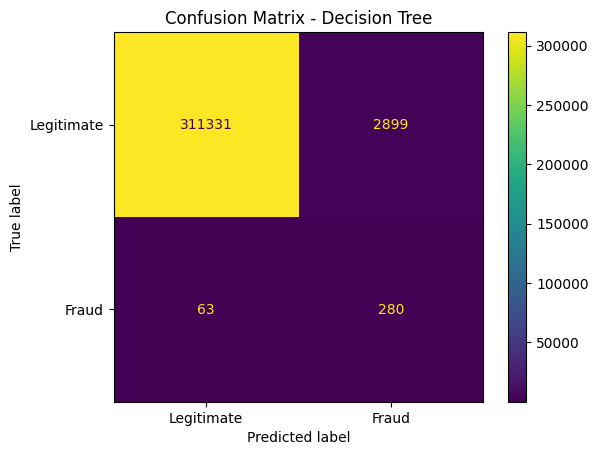

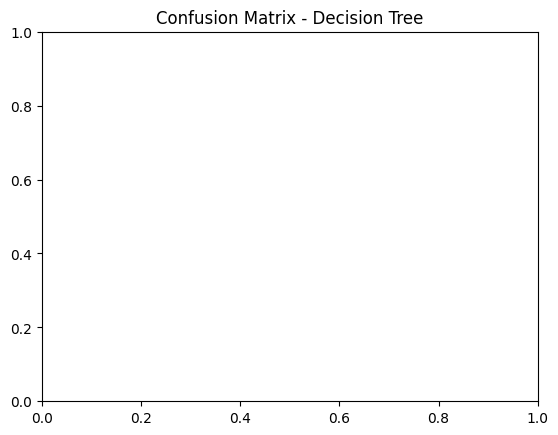

In [ ]:
# -----------------------------------------------------------------
# CELL 7: Model Evaluation and Confusion Matrix
# -----------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("--- EVALUATION MODEL 1: LOGISTIC REGRESSION ---")
print("==================================================")

# classification_report gives us Accuracy, Precision, Recall, and F1-Score
report_logistic = classification_report(y_test, predictions_logistic, target_names=['0 (Legitimate)', '1 (Fraud)'])
print(report_logistic)

# Confusion Matrix tells us where the model got it right and wrong
cm_logistic = confusion_matrix(y_test, predictions_logistic)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['Legitimate', 'Fraud'])

disp_logistic.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


print("\n\n--- EVALUATION MODEL 2: DECISION TREE ---")
print("==================================================")

# Repeating process for Decision Tree:
report_tree = classification_report(y_test, predictions_tree, target_names=['0 (Legitimate)', '1 (Fraud)'])
print(report_tree)

cm_tree = confusion_matrix(y_test, predictions_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['Legitimate', 'Fraud'])

disp_tree.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()


## Project Conclusion

This project aimed to develop a *Machine Learning* model for financial fraud detection. We used a 1-million transaction dataset, which proved to be highly imbalanced (0.11% frauds).

After a rigorous Exploratory Data Analysis (EDA) and Preprocessing (which included noise removal, One-Hot Encoding, Normalization, and resampling via RandomUnderSampler), two classification models were trained: Logistic Regression and Decision Tree.

The **Decision Tree (`max_depth=5`)** model proved superior, achieving a **Recall of 82%** and a **Precision of 9%** in the fraud class. This indicates the model was able to identify 4 out of every 5 actual frauds, maintaining a false positive balance 9 times better than the Logistic Regression model. We conclude that the model is viable and meets the proposed objectives.

## Limitations and Future Improvements:

Despite success, the project has limitations and clear opportunities for improvement:

1.  **Limitation (Hyperparameters):** The Decision Tree was tested only with `max_depth=5`. Other hyperparameter combinations were not explored.
    * **Future Improvement:** Use a mechanism like **GridSearch** to test dozens of hyperparameters and find the optimal combination, potentially improving precision.

2.  **Limitation (Algorithms):** Only two classic algorithms were tested.
    * **Future Improvement:** Experiment with more advanced and robust algorithms for imbalanced data, such as **Random Forest** or **XGBoost**, which frequently yield superior results.

3.  **Limitation (Sampling):** We used *RandomUnderSampler*, which discards legitimate data.
    * **Future Improvement:** Test *OverSampling* techniques (like **SMOTE**), which create synthetic fraud data, potentially leading to richer pattern learning.